## Model Selection using RFE (Bike Assignment) 
- Jennis

(Answer to the questions follow the code)

### Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing Housing.csv
data = pd.read_csv('day.csv')

In [4]:
# Looking at the first five rows
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
data.shape

(730, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Visualizations

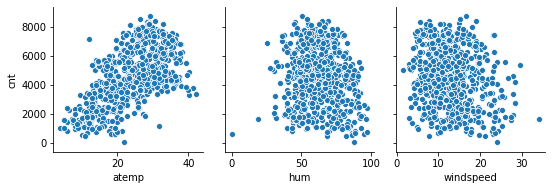

In [7]:
sns.pairplot(data=data, x_vars=['atemp', 'hum','windspeed'], y_vars='cnt')
plt.show()

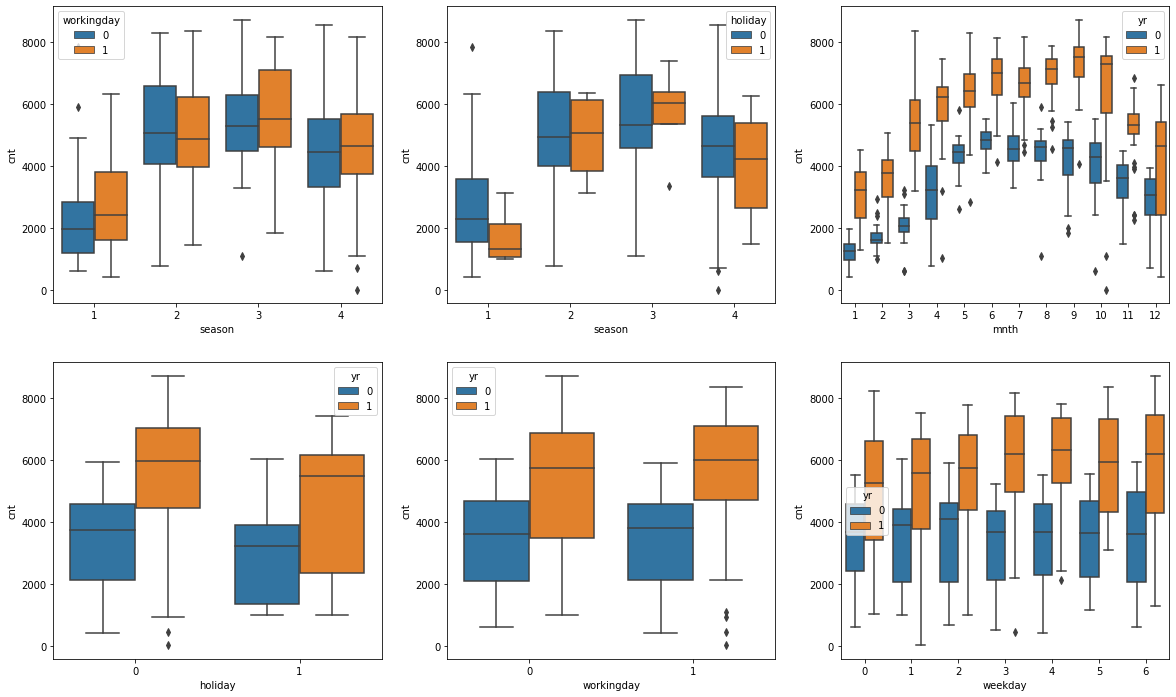

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', hue='workingday', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', hue='holiday', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt',hue='yr', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt',hue='yr', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt',hue='yr', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', hue='yr', data = data)
plt.show()

### Data Preparation

In [9]:
data=data.drop(columns=['instant','dteday','temp','casual','registered'])

In [10]:
# Check the housing dataframe now

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


### Replace categorical values

Season

In [11]:
data['season']= data['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'])

Month

In [12]:
data['mnth']= data['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'])

Weekday

In [13]:
data['weekday']= data['weekday'].replace([0,1,2,3,4,5,6],['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday'])

Weathersit

In [14]:
data['weathersit']= data['weathersit'].replace([1,2,3,4],['A','B','C','D'])

In [15]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,0,B,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,0,B,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,A,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,A,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,A,11.46350,43.6957,12.522300,1600


### Dummy Variables

#### Season

In [16]:
season = pd.get_dummies(data['season'])
season.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Drop `Fall`

In [17]:
# Let's drop the first column from season df using 'drop_first = True'
season = pd.get_dummies(data['season'], drop_first = True)

# Add the results to the original data dataframe
data = pd.concat([data, season], axis = 1)

# Now let's see the head of our dataframe.
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,January,0,Monday,0,B,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,January,0,Tuesday,0,B,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,January,0,Wednesday,1,A,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,January,0,Thursday,1,A,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,January,0,Friday,1,A,11.46350,43.6957,12.522300,1600,1,0,0


In [18]:
# Drop 'season' as we have created the dummies for it
data.drop(['season'], axis = 1, inplace = True)

data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,January,0,Monday,0,B,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,0,Tuesday,0,B,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,0,Wednesday,1,A,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,0,Thursday,1,A,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,0,Friday,1,A,11.46350,43.6957,12.522300,1600,1,0,0


#### Month

In [19]:
mnth = pd.get_dummies(data['mnth'], drop_first = True)
data = pd.concat([data, mnth], axis = 1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,...,December,February,January,July,June,March,May,November,October,September
0,0,January,0,Monday,0,B,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,January,0,Tuesday,0,B,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,January,0,Wednesday,1,A,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,January,0,Thursday,1,A,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,January,0,Friday,1,A,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [20]:
data.drop(['mnth'], axis = 1, inplace = True)
data.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Monday,0,B,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tuesday,0,B,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wednesday,1,A,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thursday,1,A,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Friday,1,A,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


#### Weekday

In [21]:
weekday = pd.get_dummies(data['weekday'], drop_first = True)
data = pd.concat([data, weekday], axis = 1)
data.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Monday,0,B,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,Tuesday,0,B,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,Wednesday,1,A,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,Thursday,1,A,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Friday,1,A,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data.drop(['weekday'], axis = 1, inplace = True)
data.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,B,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,B,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,A,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,A,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,A,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Weather Sit 

- A: Clear, Few clouds, Partly cloudy, Partly cloudy
- B: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- C: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- D: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [23]:
weathersit = pd.get_dummies(data['weathersit'], drop_first = True)
data = pd.concat([data, weathersit], axis = 1)
data.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,B,C
0,0,0,0,B,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,B,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,A,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,A,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,A,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data.drop(['weathersit'], axis = 1, inplace = True)
data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,B,C
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,B,C
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [27]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,B,C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.468282,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


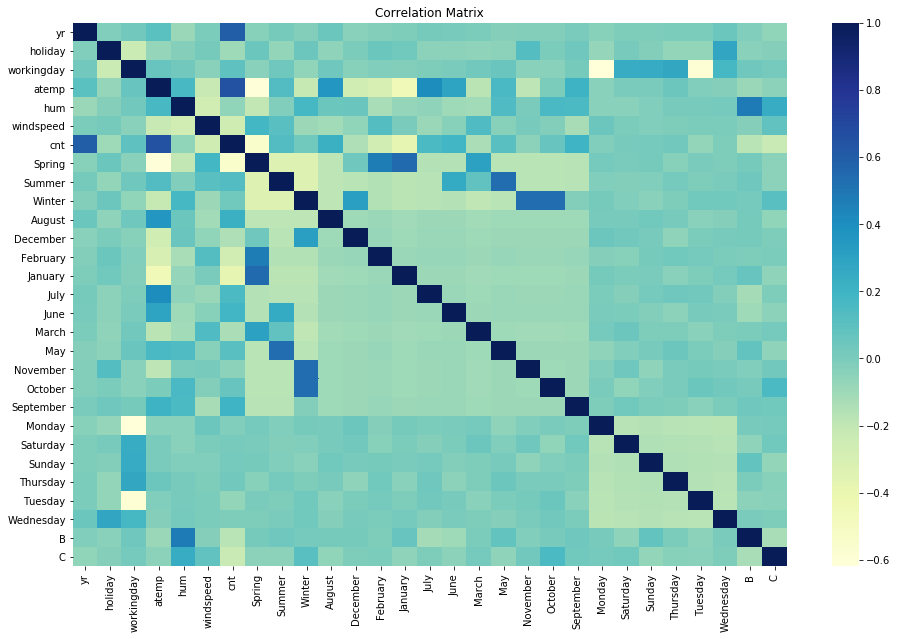

In [28]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

### Rescaling the Features 

We will use MinMax scaling.

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp', 'hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,B,C
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,1,0


### Dividing into X and Y sets for the model building

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 14),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', True, 1),
 ('December', False, 3),
 ('February', False, 2),
 ('January', True, 1),
 ('July', False, 11),
 ('June', False, 6),
 ('March', False, 7),
 ('May', False, 5),
 ('November', False, 4),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 13),
 ('Sunday', False, 10),
 ('Thursday', False, 9),
 ('Tuesday', True, 1),
 ('Wednesday', False, 8),
 ('B', True, 1),
 ('C', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Summer',
       'Winter', 'August', 'January', 'September', 'Monday', 'Tuesday', 'B',
       'C'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['Spring', 'December', 'February', 'July', 'June', 'March', 'May',
       'November', 'October', 'Saturday', 'Sunday', 'Thursday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          9.10e-189
Time:                        00:42:42   Log-Likelihood:                 510.94
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     495   BIC:                            -928.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1731      0.023      7.501      0.0

`holiday` is insignificant in presence of other variables; can be dropped

In [41]:
X_train_new = X_train_rfe

In [42]:
# Adding a constant variable 
  
X_train_lm = sm.add_constant(X_train_new)

In [43]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [44]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          9.10e-189
Time:                        00:42:42   Log-Likelihood:                 510.94
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     495   BIC:                            -928.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1731      0.023      7.501      0.0

In [45]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'Summer', 'Winter', 'August', 'January', 'September', 'Monday',
       'Tuesday', 'B', 'C'],
      dtype='object')

In [46]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,34.12
11,Monday,8.41
12,Tuesday,8.22
1,holiday,2.24
3,atemp,1.91
4,hum,1.89
13,B,1.57
7,Winter,1.56
9,January,1.55
6,Summer,1.48


## VIF model #1

In [51]:
# Dropping highly correlated variables and insignificant variables

X = X_train_new.drop('workingday', 1,)

In [52]:
# Build a first fitted model
X_train_VIF1 = sm.add_constant(X)

lr_VIF1 = sm.OLS(y_train, X_train_VIF1).fit()

In [53]:
# Print the summary of the model
print(lr_VIF1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          9.10e-189
Time:                        00:44:48   Log-Likelihood:                 510.94
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     495   BIC:                            -928.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2496      0.028      8.800      0.0

In [54]:
X = X_train_VIF1.drop(['const'], axis=1)

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.87
2,atemp,11.47
4,windspeed,3.66
12,B,2.17
0,yr,2.04
6,Winter,2.03
5,Summer,1.96
7,August,1.57
8,January,1.54
9,September,1.32


## VIF Model #2

In [56]:
X= X_train_VIF1.drop(['Monday'], axis=1)

In [57]:
# Build a second fitted model
X_train_VIF2 = sm.add_constant(X)

lr_VIF2 = sm.OLS(y_train, X_train_VIF2).fit()

In [58]:
# Print the summary of the model
print(lr_VIF2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.9
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          8.33e-190
Time:                        00:44:50   Log-Likelihood:                 510.64
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     496   BIC:                            -934.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2518      0.028      8.931      0.0

In [59]:
X = X_train_VIF2.drop(['const'], axis=1)

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.82
2,atemp,11.46
4,windspeed,3.61
11,B,2.17
0,yr,2.04
6,Winter,2.03
5,Summer,1.96
7,August,1.56
8,January,1.54
9,September,1.32


## VIF Model #3

In [61]:
X= X_train_VIF2.drop(['hum'], axis=1)

In [62]:
# Build a third fitted model
X_train_VIF3 = sm.add_constant(X)

lr_VIF3 = sm.OLS(y_train, X_train_VIF3).fit()

In [63]:
# Print the summary of the model
print(lr_VIF3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          5.43e-187
Time:                        00:44:51   Log-Likelihood:                 501.16
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.247      0.0

In [64]:
X_train_final= X_train_VIF3.drop(['const'], axis=1)

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.03
3,windspeed,3.29
0,yr,2.04
4,Summer,1.90
5,Winter,1.58
6,August,1.56
10,B,1.54
8,September,1.31
7,January,1.23
9,Tuesday,1.17


## Final model

In [66]:
X= X_train_VIF3.drop(['C','holiday'], axis=1)

In [67]:
# Build a fourth fitted model
X_train_VIF4 = sm.add_constant(X)

lr_VIF4 = sm.OLS(y_train, X_train_VIF4).fit()

In [68]:
# Print the summary of the model
print(lr_VIF4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     187.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          5.58e-162
Time:                        00:45:06   Log-Likelihood:                 436.39
No. Observations:                 510   AIC:                            -850.8
Df Residuals:                     499   BIC:                            -804.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1491      0.022      6.662      0.0

In [69]:
X_train_final= X_train_VIF4.drop(['const'], axis=1)

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.03
2,windspeed,3.21
0,yr,2.03
3,Summer,1.90
5,August,1.56
4,Winter,1.55
9,B,1.51
7,September,1.31
6,January,1.22
8,Tuesday,1.16


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [71]:
y_train_cnt = lr_VIF4.predict(X_train_VIF4)

In [72]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
residuals = y_train - y_train_cnt

Text(0.5, 0, 'Errors')

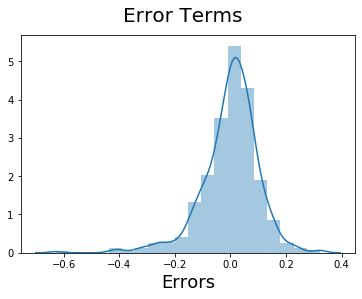

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

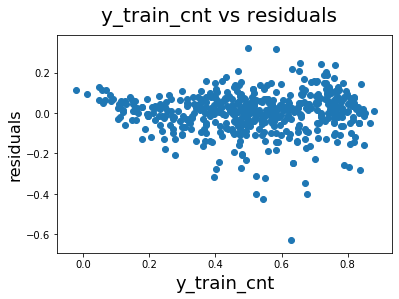

In [75]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train_cnt,residuals)
fig.suptitle('y_train_cnt vs residuals', fontsize=20)              # Plot heading 
plt.xlabel('y_train_cnt', fontsize=18)                          # X-label
plt.ylabel('residuals', fontsize=16)                          # Y-label
plt.show()

## Making Predictions

#### Applying the scaling on the test sets

In [76]:
num_vars = ['atemp', 'hum','windspeed','cnt']

In [77]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [78]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,B,C
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [79]:
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_final.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [81]:
# Making predictions
y_pred = lr_VIF4.predict(X_test_new)

## Model Evaluation

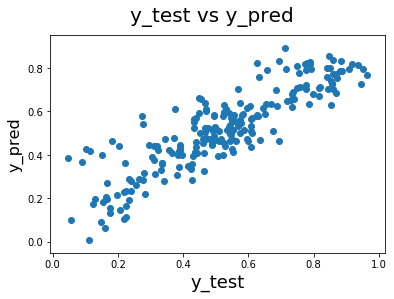

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

## Assignment-based Subjective Questions

1. From your analysis of the categorical variables from the dataset, what could you infer about
   their effect on the dependent variable? (3 marks)<br>
  Some of the variables affect negatively the dependent variable. For example, the month of January has a noticeable   lower count in users for both years. The categorical variables in this case are completely out of our control,       hence it my have a positive or negative influence.

2. Why is it important to use drop_first=True during dummy variable creation? (2 mark)<br>
   By removing the first column, you avoid the dummy variables being redundant. In this case, the dataset doesn't        have many categorical levels. To leave all the columns, if will affect adverserly the prediction of the values.

3. Looking at the pair-plot among the numerical variables, which one has the highest correlation
   with the target variable? (1 mark) <br>
   The `atemp` or feel temperature has the higher linear correlation to the count.

4. How did you validate the assumptions of Linear Regression after building the model on the training set? (3 marks)<br> The predictions were graph in order to see the behavior.
   

5. Based on the final model, which are the top 3 features contributing significantly towards
   explaining the demand of the shared bikes? (2 marks) <br>
   The top three variables were `atemp`, `windspeed` and `yr`.

## General Subjective Questions

1. Explain the linear regression algorithm in detail. (4 marks) <br>
   The linear regression algorith is a method of supervised machine learning that determines the relationship between    a number of variables using linear regression. With this principles, the coefficients of a line are calculated and    used to predict the value of a dependent variable (y) in function of the independent variables. In this              assignment, the numerical data was rescaled and dummies were created for the categorical data. RFE was used to        chose 15 variables of high importance. Using VIF, five other variables were discarded. Adding a constant in order    to use OLS, a model was trained and used to predict values.  

2. Explain the Anscombe’s quartet in detail. (3 marks)

Given the `anscombe` data set, we can see the `count`, `mean`  &	`std` are the same for x and y for the 4 datasets.

In [96]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [97]:
pivot= df.groupby('dataset').describe()
pivot

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

But when we graph, all the datasets are completely different.

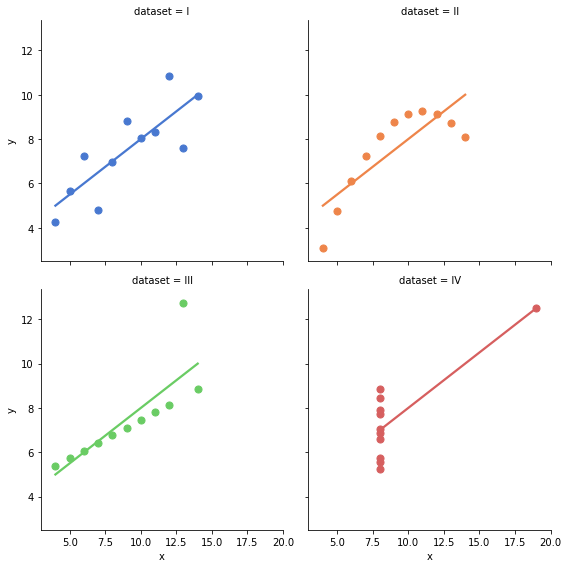

In [87]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

It shows the importance of visualizing the data.

3. What is Pearson’s R? (3 marks) <br>
   The Pearson's R is used to measure the linear correlation between two variables. The value is from -1 to 1 where a    value of -1 is a negative correlation, a value of 0 is no correlation and a value of 1 is perfectly correlated.

4. What is scaling? Why is scaling performed? What is the difference between normalized scaling and standardized        scaling? (3 marks)<br>
   Scaling is used when the numeric data has different dimensions and proportions the data depending on the method      used. Normalizing the data or using MinMax, transform the data points in a value between 0 and 1 while                Standarizing the data converts the attributes mean to zero and the resultant distribution has a unit standard        deviation.

5. You might have observed that sometimes the value of VIF is infinite. Why does this happen? (3 marks) <br>
   This shows a perfect multicollinearity, meaning the R square is zero.

6. What is a Q-Q plot? Explain the use and importance of a Q-Q plot in linear regression. (3 marks)<br>
   The Q-Q plot is used to verify the data has a normal distribution. If random quartile samples are taken, when        graph it should illustrate if the data fits a linear regresssion model.